In [1]:
from typing import Dict, List
from aufgabe3 import TicTacToe as ttt_base
from players import AlphaBetaNPC, HumanPlayer, MinimaxNPC, RandomNPC, PlayerInterface
import matplotlib.pyplot as plt
from datetime import datetime

class TicTacToe(ttt_base):
    def __init__(self, players: List[str]) -> None:
        super().__init__()
        self.sym_to_type: Dict[str, PlayerInterface] = {}
        self.moves = []
        for i, sym in enumerate(self.player_symbols):
            choice = players[i]
            if(choice == "h"):
                self.sym_to_type[sym] = HumanPlayer(sym, self.board)
            elif(choice == "z"):
                self.sym_to_type[sym] = RandomNPC(sym, self.board)
            elif(choice == "m"):
                self.sym_to_type[sym] = MinimaxNPC(sym, self.board)
            elif(choice == "a"):
                self.sym_to_type[sym] = AlphaBetaNPC(sym, self.board)
            else:
                print("Try again you silly goose!")

    def get_and_set_move(self, player_symbol: str) -> None:
        move = self.sym_to_type.get(player_symbol).get_move()
        self.board[move] = player_symbol
        self.moves.append({player_symbol: move})

    def start(self) -> str:
        i = 0
        while True:
            curr_symbol = self.player_symbols[i]
            self.get_and_set_move(curr_symbol)
            i = (i + 1) % 2
            if self.is_winner(curr_symbol):
                return curr_symbol
            if self.is_board_full():
                return "Tie"

    def reset(self) -> None:
        for key in self.board.keys():
            self.board[key] = " "

def simulate_game(ttt, anz_games):
    res = {"X":0, "O":0, "Tie":0}
    for i in range(anz_games):
        res[ttt.start()]+=1
        ttt.reset()
    return res

def visualize_res(res):
    plt.bar(res.keys(), res.values(), color="limegreen")
    plt.show()

def test_with_players(players):
    ttt = TicTacToe(players)
    anz_games = 100
    zeit = datetime.now()
    result = simulate_game(ttt, anz_games)
    zeit = datetime.now() - zeit
    
    print(f"{anz_games = }")
    print(f"Time: {zeit.seconds}.{zeit.microseconds} Sekunden")
    zeit = zeit/anz_games
    print(f"Average Time per Round: {zeit.seconds}.{zeit.microseconds} Sekunden")
    print(f"{result = }")
    visualize_res(result)

## AlphaBeta vs Random

anz_games = 100
Time: 30.142392 Sekunden
Average Time per Round: 0.301424 Sekunden
result = {'X': 99, 'O': 0, 'Tie': 1}


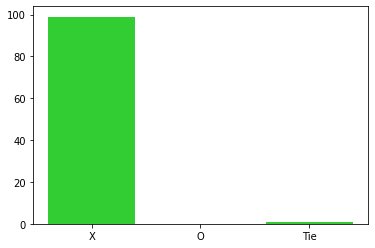

In [38]:
test_with_players(["a", "z"])

## Random vs AlphaBeta

anz_games = 100
Time: 6.621460 Sekunden
Average Time per Round: 0.66215 Sekunden
result = {'X': 0, 'O': 80, 'Tie': 20}


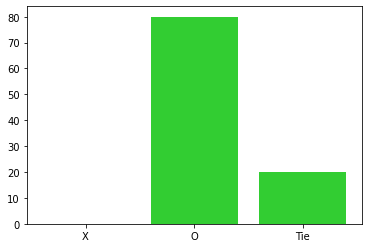

In [37]:
test_with_players(["z", "a"])

## Random vs MiniMax

anz_games = 100
Time: 103.988131 Sekunden
Average Time per Round: 1.39881 Sekunden
result = {'X': 0, 'O': 79, 'Tie': 21}


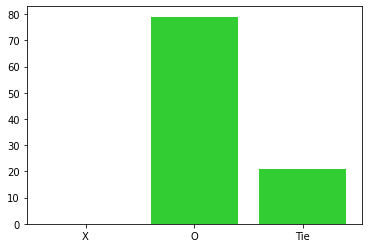

In [39]:
test_with_players(["z", "m"])

## MiniMax vs Random

anz_games = 100
Time: 859.572840 Sekunden
Average Time per Round: 8.595728 Sekunden
result = {'X': 99, 'O': 0, 'Tie': 1}


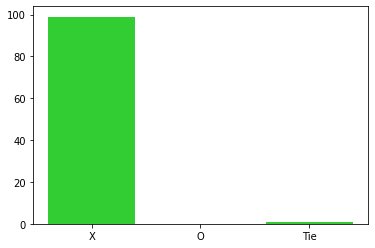

In [41]:
test_with_players(["m", "z"])

## Gleiches Ergebnis?

In [2]:
ttt = TicTacToe(["a","a"])
ttt.start()
print(ttt.moves)
ttt = TicTacToe(["m","m"])
ttt.start()
print(ttt.moves)

[{'X': '1'}, {'O': '5'}, {'X': '2'}, {'O': '3'}, {'X': '7'}, {'O': '4'}, {'X': '6'}, {'O': '8'}, {'X': '9'}]
[{'X': '1'}, {'O': '5'}, {'X': '2'}, {'O': '3'}, {'X': '7'}, {'O': '4'}, {'X': '6'}, {'O': '8'}, {'X': '9'}]
